# **TASK 1 : SENTIMENT ANALYSIS ON SOCIAL MEDIA DATA**

### **Description:**

Build a sentiment analysis model to classify social media posts as positive, negative, or neutral.

### **Steps:**

1. Data Collection: Gather a dataset of social media posts with labeled sentiments.
2. Text Preprocessing: Clean and preprocess the text data by removing special characters, stopwords, and performing tokenization.
3. Feature Extraction: Convert the text data into numerical features using techniques like TF-IDF or word embeddings.
4. Model Selection: Choose a suitable classification algorithm such as Naive Bayes, Support Vector Machines, or a neural network.
7. Model Training: Train the selected model using the preprocessed data.
8. Model Evaluation: Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score.
9. Deployment: Create a simple web interface where users can input their own text for sentiment analysis.

###**Tech Stack:**

• Python
• Natural Language Processing libraries
• Machine Learning frameworks

# **1. Data Collection :**

## **Dataset : amazon_reviews.csv**

This dataset containing Amazon Product Data includes product categories and various metadata. The product with the most comments in the electronics category has user ratings and comments.

In [148]:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Coding Raja/amazon_reviews.csv")
dataset

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


# **2. Text Preprocessing :**

In [149]:
dataset.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [150]:
dataset = dataset.sort_values("wilson_lower_bound", ascending=False)
dataset.drop('Unnamed: 0', inplace = True, axis = 1)
dataset.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.0,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,I have tested dozens of SDHC and micro-SDHC ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1.0,NOTE: please read the last update (scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,"If your card gets hot enough to be painful, it...",2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,Sandisk announcement of the first 128GB micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109


In [151]:
dataset.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [152]:
sample_review = dataset.reviewText[4212]
sample_review

'NOTE:  please read the last update (scroll to the bottom) - I\'m leaving this review as 1 star as it appears to help others who purchased and had a similar experience.I give SanDisk 5 stars for customer service and 1 star for the product (for those manufactured in the past)  For those newly manufactured products that contain the software ROM fix, I\'d give the product 5 stars.To all those who purchased this card due to all the great reviews.... and then used it in a Galaxy S4 (GS4) smartphone for storage, the solution to the problem is not one you can solve without returning the card to SanDisk for a replacement under warranty.  Believe me I tried everything that the Google searches returned as solutions... formatting as exFAT, formatting in the GS4 then copying data to the card while in the phone etc.... nothing worked... and so now please stop pulling out your hair and hopefully you will get the same result which I hope to get soon (just RMA\'d and will send it back tomorrow for a f

In [153]:
# we clean it from punctuation and numbers - using regex. {Regular expression}

import re

sample_review = re.sub("[^a-zA-Z]",' ',sample_review)
sample_review

'NOTE   please read the last update  scroll to the bottom    I m leaving this review as   star as it appears to help others who purchased and had a similar experience I give SanDisk   stars for customer service and   star for the product  for those manufactured in the past   For those newly manufactured products that contain the software ROM fix  I d give the product   stars To all those who purchased this card due to all the great reviews     and then used it in a Galaxy S   GS   smartphone for storage  the solution to the problem is not one you can solve without returning the card to SanDisk for a replacement under warranty   Believe me I tried everything that the Google searches returned as solutions    formatting as exFAT  formatting in the GS  then copying data to the card while in the phone etc     nothing worked    and so now please stop pulling out your hair and hopefully you will get the same result which I hope to get soon  just RMA d and will send it back tomorrow for a free

In [154]:
sample_review = sample_review.lower().split()
sample_review

['note',
 'please',
 'read',
 'the',
 'last',
 'update',
 'scroll',
 'to',
 'the',
 'bottom',
 'i',
 'm',
 'leaving',
 'this',
 'review',
 'as',
 'star',
 'as',
 'it',
 'appears',
 'to',
 'help',
 'others',
 'who',
 'purchased',
 'and',
 'had',
 'a',
 'similar',
 'experience',
 'i',
 'give',
 'sandisk',
 'stars',
 'for',
 'customer',
 'service',
 'and',
 'star',
 'for',
 'the',
 'product',
 'for',
 'those',
 'manufactured',
 'in',
 'the',
 'past',
 'for',
 'those',
 'newly',
 'manufactured',
 'products',
 'that',
 'contain',
 'the',
 'software',
 'rom',
 'fix',
 'i',
 'd',
 'give',
 'the',
 'product',
 'stars',
 'to',
 'all',
 'those',
 'who',
 'purchased',
 'this',
 'card',
 'due',
 'to',
 'all',
 'the',
 'great',
 'reviews',
 'and',
 'then',
 'used',
 'it',
 'in',
 'a',
 'galaxy',
 's',
 'gs',
 'smartphone',
 'for',
 'storage',
 'the',
 'solution',
 'to',
 'the',
 'problem',
 'is',
 'not',
 'one',
 'you',
 'can',
 'solve',
 'without',
 'returning',
 'the',
 'card',
 'to',
 'sandisk',

In [155]:
rt = lambda x: re.sub("[^a-zA-Z]",' ',str(x))
dataset["reviewText"] = dataset["reviewText"].map(rt)
dataset["reviewText"] = dataset["reviewText"].str.lower()
dataset.head(10)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109
1835,goconfigure,5.0,bought from bestbuy online the day it was anno...,2014-02-28,283,60,8,68,52,0.882353,0.784651
3981,"R. Sutton, Jr. ""RWSynergy""",5.0,the last few days i have been diligently shopp...,2012-10-22,777,112,27,139,85,0.805755,0.732136
3807,R. Heisler,3.0,i bought this card to replace a lost gig in...,2013-02-27,649,22,3,25,19,0.880000,0.700442
4306,Stellar Eller,5.0,while i got this card as a deal of the day o...,2012-09-06,823,51,14,65,37,0.784615,0.670334
4596,"Tom Henriksen ""Doggy Diner""",1.0,hi i ordered two card and they arrived the nex...,2012-09-22,807,82,27,109,55,0.752294,0.663595


In [156]:
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

'''
# Sentiment analysis
# TextBlob Exit will return polarity and subjectivity.
# Polarity indicates your mood, that is, whether it is positive.
# It returns a value between 0 and 1. The closer to 1 the more positive, the closer to 0 the more negative.
'''

dataset[['polarity', 'subjectivity']] = dataset['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in dataset['reviewText'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        dataset.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        dataset.loc[index, 'sentiment'] = "Positive"
    else:
        dataset.loc[index, 'sentiment'] = "Neutral"

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-156-0674e5228cac>:15: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [157]:
# 20 Identifying the interpretation, now we can include the positive, negative and neutral status of the comments.

dataset[dataset["sentiment"] == "Positive"].sort_values("wilson_lower_bound", ascending=False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",5.0,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,5.0,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4212,SkincareCEO,1.0,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",1.0,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4672,Twister,5.0,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive


In [158]:
# Let's see if we have an unbalanced data problem

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(),
                          x = [str(i) for i in df[column_name].value_counts().index],
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D'],
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)

    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D'])),
                  row = 1, col = 2)

    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

In [159]:
categorical_variable_summary(dataset,'overall')

In [160]:
categorical_variable_summary(dataset,'sentiment')

# **3. Feature Extraction :**

In [161]:
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "Positive"
    elif label == 3.0:
        return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "Negative"

In [162]:
dataset['overall'] = dataset["overall"].apply(sentiment)

<Axes: >

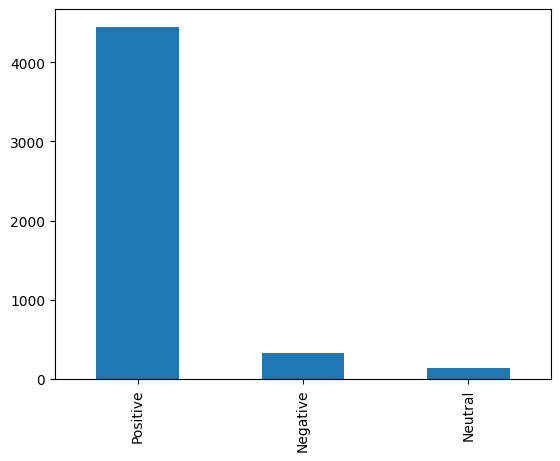

In [163]:
dataset.overall.value_counts().plot(kind = "bar")

In [164]:
pos_comments = dataset[dataset.overall == 'Positive']
pos_comments.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
2031,"Hyoun Kim ""Faluzure""",Positive,update so my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive
3449,NLee the Engineer,Positive,i have tested dozens of sdhc and micro sdhc ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive
4672,Twister,Positive,sandisk announcement of the first gb micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive
1835,goconfigure,Positive,bought from bestbuy online the day it was anno...,2014-02-28,283,60,8,68,52,0.882353,0.784651,0.386111,0.616667,Positive
3981,"R. Sutton, Jr. ""RWSynergy""",Positive,the last few days i have been diligently shopp...,2012-10-22,777,112,27,139,85,0.805755,0.732136,0.070466,0.445756,Positive


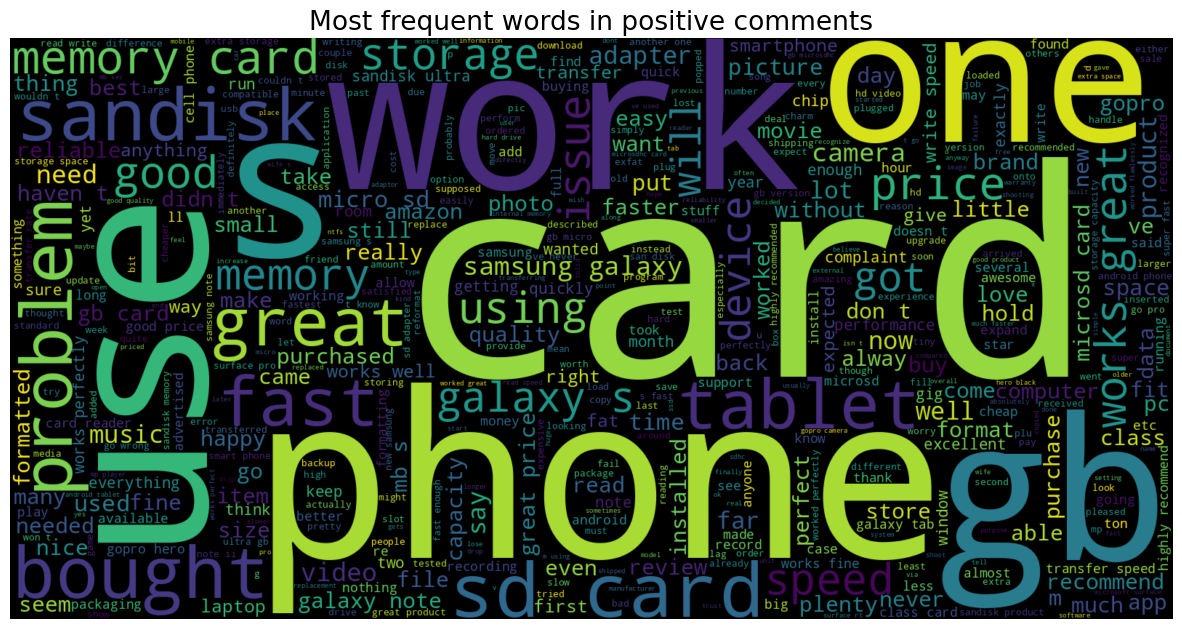

In [165]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [166]:
neu_comments = dataset[dataset.overall == 'Neutral']
neu_comments.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
3807,R. Heisler,Neutral,i bought this card to replace a lost gig in...,2013-02-27,649,22,3,25,19,0.880000,0.700442,0.194643,0.675000,Negative
1910,H. Al-Harethi,Neutral,i purchased this card on a daily lighting deal...,2012-10-31,768,5,2,7,3,0.714286,0.358934,0.053206,0.328482,Positive
4727,villapoo,Neutral,bought this for samsung galaxy s in fall ...,2013-05-13,574,2,0,2,2,1.000000,0.342380,0.273333,0.478333,Positive
3820,"richard c maxwell ""R Maxwell""",Neutral,i trusted this company but they only warranty ...,2013-03-15,633,2,0,2,2,1.000000,0.342380,-0.090000,0.455556,Positive
3622,Phillip Lyle,Neutral,there is a known issue with a batch of these c...,2013-03-28,620,3,1,4,2,0.750000,0.300642,-0.075000,0.225000,Negative


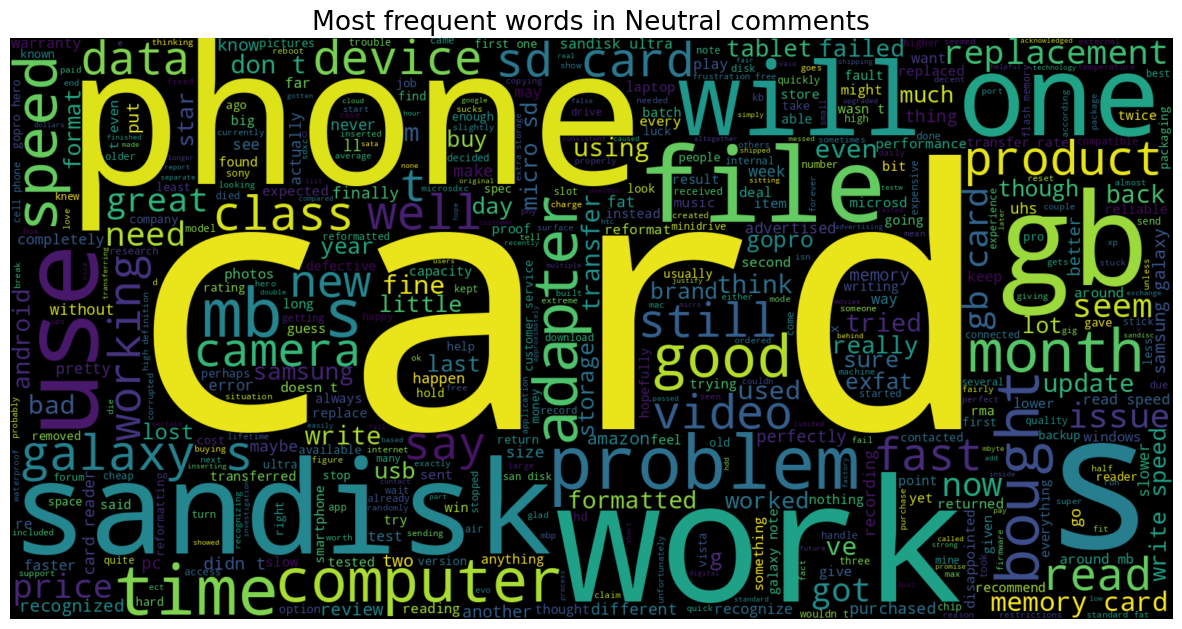

In [167]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Neutral comments', fontsize=19)
plt.show()

In [168]:
neg_comments = dataset[dataset.overall == 'Negative']
neg_comments.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment
4212,SkincareCEO,Negative,note please read the last update scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive
317,"Amazon Customer ""Kelly""",Negative,if your card gets hot enough to be painful it...,2012-02-09,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive
4596,"Tom Henriksen ""Doggy Diner""",Negative,hi i ordered two card and they arrived the nex...,2012-09-22,807,82,27,109,55,0.752294,0.663595,0.088242,0.452143,Positive
1596,Erik Fisher,Negative,not ok with gopro hero black edition the s...,2013-11-29,374,3,0,3,3,1.000000,0.438503,-0.135417,0.327083,Negative
3587,pepper45322,Negative,thank god for amazon return policy or i would ...,2012-12-29,709,6,2,8,4,0.750000,0.409275,0.034722,0.447222,Negative


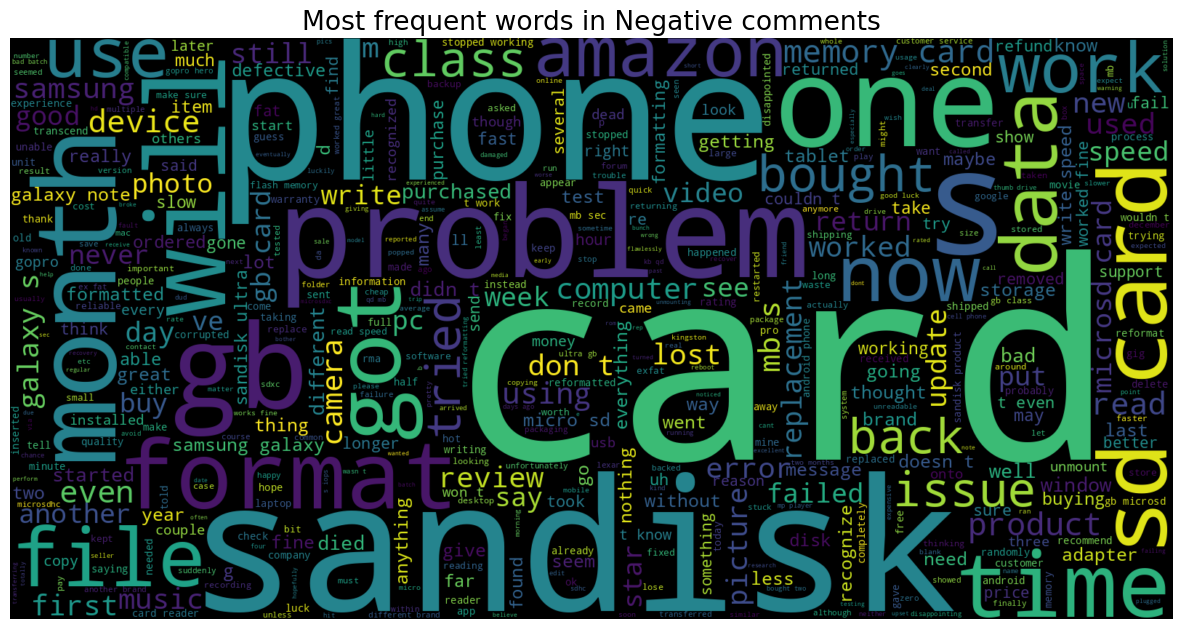

In [169]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative comments', fontsize=19)
plt.show()

In [170]:
# Create Lables

from sklearn.preprocessing import LabelEncoder

def create_label(dataset, dependent_var, independent_var):
  sia = SentimentIntensityAnalyzer()
  dataset[independent_var] = dataset[dependent_var].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
  dataset[independent_var] = LabelEncoder().fit_transform(dataset[independent_var])

  X = dataset[dependent_var]
  y = dataset[independent_var]

  return X, y

In [171]:
X, y = create_label(dataset, "reviewText", "sentiment_label")

# **4. Model Selection**

*   Logistic Regression
*   Random Forest

# **5. Model Training**

In [172]:
# Split Dataset

from sklearn.model_selection import train_test_split, cross_val_score

def split_dataset(dataframe, X, y):
  train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=1)
  return train_x, test_x, train_y, test_y

In [173]:
train_x, test_x, train_y, test_y = split_dataset(dataset, X, y)

In [174]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def create_features_count(train_x, test_x):
  # Count Vectors
  vectorizer = CountVectorizer()
  x_train_count_vectorizer = vectorizer.fit_transform(train_x)
  x_test_count_vectorizer = vectorizer.fit_transform(test_x)

  return x_train_count_vectorizer, x_test_count_vectorizer

In [175]:
x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)

In [176]:
def create_features_TFIDF_word(train_x, test_x):
  # TF-IDF word
  tf_idf_word_vectorizer = TfidfVectorizer()
  x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(train_x)
  x_test_tf_idf_word = tf_idf_word_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_word, x_test_tf_idf_word

In [177]:
x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)

# **6. Model Evaluation**

### **Logistic Regression**

In [178]:
from sklearn.linear_model import LogisticRegression

def crate_model_logistic(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  loj_count = LogisticRegression(solver='lbfgs', max_iter=1000)
  loj_model_count = loj_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(loj_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  loj_word = LogisticRegression(solver='lbfgs', max_iter=1000)
  loj_model_word = loj_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(loj_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  return loj_model_count, loj_model_word

In [179]:
loj_model_count, loj_model_word = crate_model_logistic(train_x, test_x)

Accuracy - Count Vectors: 0.827
Accuracy - TF-IDF Word: 0.781


### **Random Forest**

In [180]:
from sklearn.ensemble import RandomForestClassifier

def crate_model_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_count = RandomForestClassifier()
  rf_model_count = rf_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  rf_word = RandomForestClassifier()
  rf_model_word = rf_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  return rf_model_count, rf_model_word

In [181]:
rf_model_count, rf_model_word = crate_model_randomforest(train_x, test_x)

Accuracy - Count Vectors: 0.788
Accuracy - TF-IDF Word: 0.776


# **7. Deployment :**

In [182]:
def predict_count(train_x, model, new_comment):
  new_comment= pd.Series(new_comment)
  new_comment = CountVectorizer().fit(train_x).transform(new_comment)
  result = model.predict(new_comment)
  if result==1:
    print("Comment is Positive")
  else:
    print("Comment is Negative")

In [183]:
# Logistic Regression

predict_count(train_x, model=loj_model_count, new_comment="this product is very good :)")

Comment is Positive


In [184]:
# Random Forest

predict_count(train_x, model=rf_model_count, new_comment="this product is very bad :)")

Comment is Positive


In [185]:
# Sample Review

new_comment=pd.Series(dataset["reviewText"].sample(1).values)
new_comment

0    i use this everyday with my microsoft surface ...
dtype: object

In [186]:
# Sample Review - Random Forest

predict_count(train_x, model=rf_model_count, new_comment=new_comment)

Comment is Positive
